# Common Libraries

In [1]:
import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt

# Custom Libraries

In [2]:
import sys
sys.path.append("/home/seojin/Seojin_commonTool/Module/Brain_Surface")

from surface_analysis import vol_to_surf, surface_profile, show_both_hemi_sampling_coverage
import surfAnalysisPy as surf

# Params

In [3]:
surf_resolution = 32
save_dir_path = "/mnt/ext1/seojin/temp"

# Paths

In [8]:
surf_dir_path = f"/mnt/sda2/Common_dir/Atlas/Surface/fs_LR_{surf_resolution}"

# Template
surf_hemisphere = "L"
l_pial_surf_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.pial.surf.gii")
l_white_surf_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.white.surf.gii")
l_template_surface_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.flat.surf.gii")
l_inflated_brain_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.inflated.surf.gii")

surf_hemisphere = "R"
r_pial_surf_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.pial.surf.gii")
r_white_surf_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.white.surf.gii")
r_template_surface_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.flat.surf.gii")
r_inflated_brain_path = os.path.join(surf_dir_path, f"fs_LR.{surf_resolution}k.{surf_hemisphere}.inflated.surf.gii")

# Constants

In [13]:
n_vertex = nb.load(l_template_surface_path).darrays[0].data.shape[0]

dummy_surface_data = np.zeros(n_vertex)

# Plain map

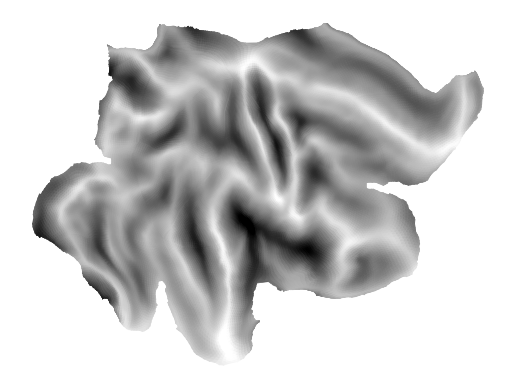

In [14]:
ax = surf.plot.plotmap(data = np.zeros(n_vertex), 
                       surf = f"fs{surf_resolution}k_{surf_hemisphere}", 
                       colorbar = False, 
                       threshold = 0.1,
                       cscale = [0.1, 1])

# Grid

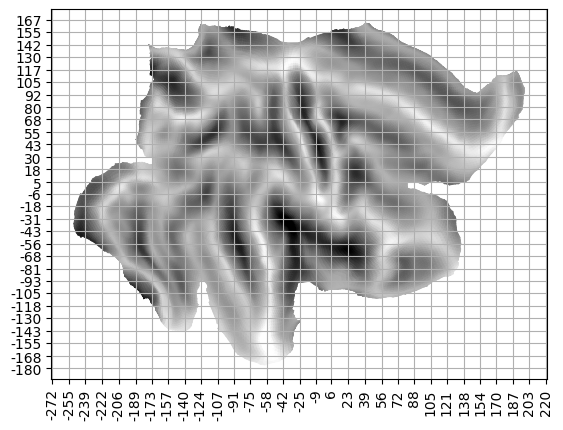

In [15]:
ax = surf.plot.plotmap(data = np.zeros(n_vertex), 
                       surf = f"fs{surf_resolution}k_{surf_hemisphere}", 
                       colorbar = False, 
                       threshold = 0.1,
                       cscale = [0.1, 1])
ax.grid(True)
ax.axis("on")
x_min, x_max = int(ax.get_xlim()[0]), int(ax.get_xlim()[1])
y_min, y_max = int(ax.get_ylim()[0]), int(ax.get_ylim()[1])

x_count = 30
y_count = 30
x_interval = (x_max - x_min) / x_count
y_interval = (y_max - y_min) / y_count
ax.set_xticks(np.arange(x_min, x_max, x_interval).astype(int))
ax.set_xticklabels(np.arange(x_min, x_max, x_interval).astype(int), rotation = 90)

ax.set_yticks(np.arange(y_min, y_max, y_interval).astype(int))
ax.set_yticklabels(np.arange(y_min, y_max, y_interval).astype(int), rotation = 0)
fig = ax.figure

# Interactive

In [16]:
def interactive_mouse_location(surf_hemisphere, surf_resolution = 32):
    %matplotlib widget    
    
    fig, ax = plt.subplots()
    ax.set_title("Move your mouse over the plot")
    
    ax = surf.plot.plotmap(data = np.zeros(n_vertex), 
                           surf = f"fs{surf_resolution}k_{surf_hemisphere}", 
                           colorbar = False)
    ax.axis("on")

/home/seojin/anaconda3/envs/surfVis/lib/python3.10/site-packages/SUITPy/flatmap.py:497: RuntimeWarning: invalid value encountered in divide
  data = ((data - cscale[0]) / (cscale[1] - cscale[0]))


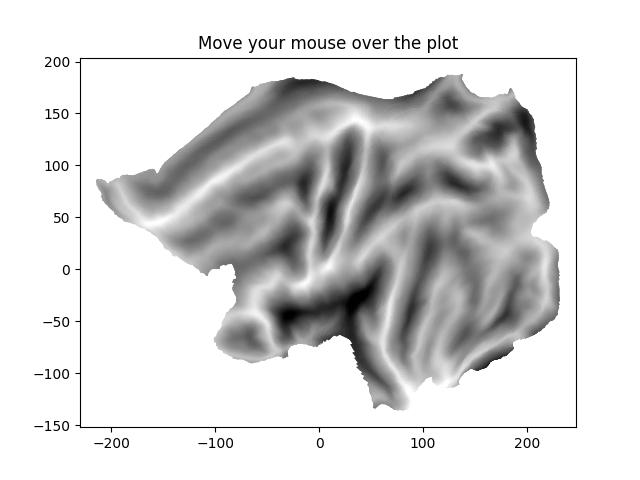

In [18]:
interactive_mouse_location(surf_hemisphere = "L")

/home/seojin/anaconda3/envs/surfVis/lib/python3.10/site-packages/SUITPy/flatmap.py:497: RuntimeWarning: invalid value encountered in divide
  data = ((data - cscale[0]) / (cscale[1] - cscale[0]))


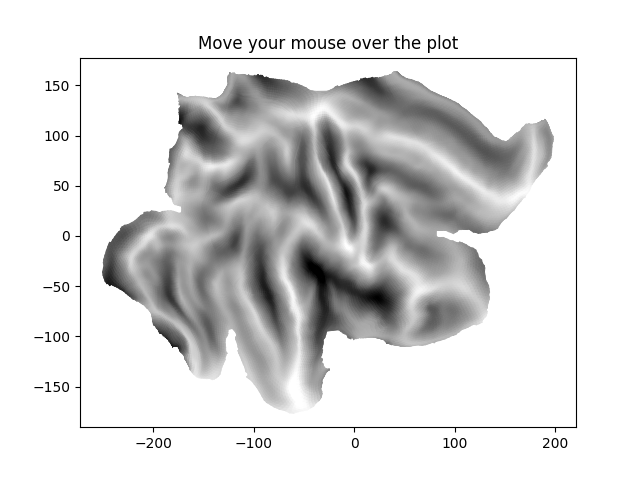

In [46]:
interactive_mouse_location(surf_hemisphere = "R")

# Profile

In [52]:
L_from_point = np.array([-37, 109])
L_to_point = np.array([100, 109])

R_from_point = np.array([37, 90])
R_to_point = np.array([-100, 90])

In [53]:
width = 20
cross_section_n_sampling = 30

In [54]:
l_cross_section_result_info_onMove = surface_profile(template_surface_path = l_template_surface_path,
                                                           surface_data = np.expand_dims(np.zeros(n_vertex), 1),
                                                           from_point = L_from_point,
                                                           to_point = L_to_point,
                                                           width = width,
                                                           n_sampling = cross_section_n_sampling)

r_cross_section_result_info_onMove = surface_profile(template_surface_path = r_template_surface_path,
                                                           surface_data = np.expand_dims(np.zeros(n_vertex), 1),
                                                           from_point = R_from_point,
                                                           to_point = R_to_point,
                                                           width = width,
                                                           n_sampling = cross_section_n_sampling)

save: /mnt/ext1/seojin/temp/L_hemi_coverage.png
save: /mnt/ext1/seojin/temp/R_hemi_coverage.png
save: /mnt/ext1/seojin/temp/both_hemi_coverage.png


<Figure size 640x480 with 0 Axes>

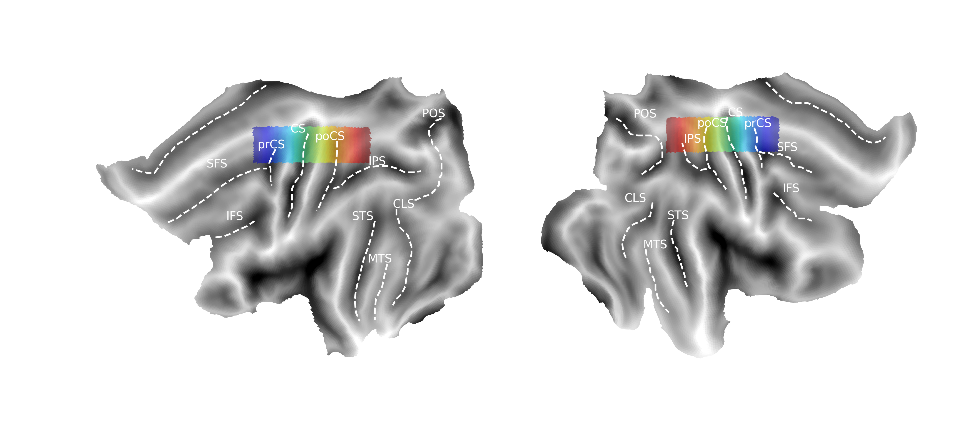

In [55]:
%matplotlib inline
show_both_hemi_sampling_coverage(l_sampling_coverage = l_cross_section_result_info_onMove["sampling_coverages"],
                                 r_sampling_coverage = r_cross_section_result_info_onMove["sampling_coverages"],
                                 save_dir_path = save_dir_path,
                                 surf_resolution = surf_resolution,
                                 is_sulcus_label = True)